# <center>  WEBSCRAPING </br>
#  <center>  Extraer información de sitios web</center>
### Se extrae información importante sobre la población de la Ciudad de Buenos Aires


### <center>Importar Librerias</center>

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import funciones

import warnings
warnings.filterwarnings("ignore")

__________

### <center>Extracción de datos</center>

Extracción de la información
Se define la URL de la página que contiene la tabla con la población de los los años a explorar.

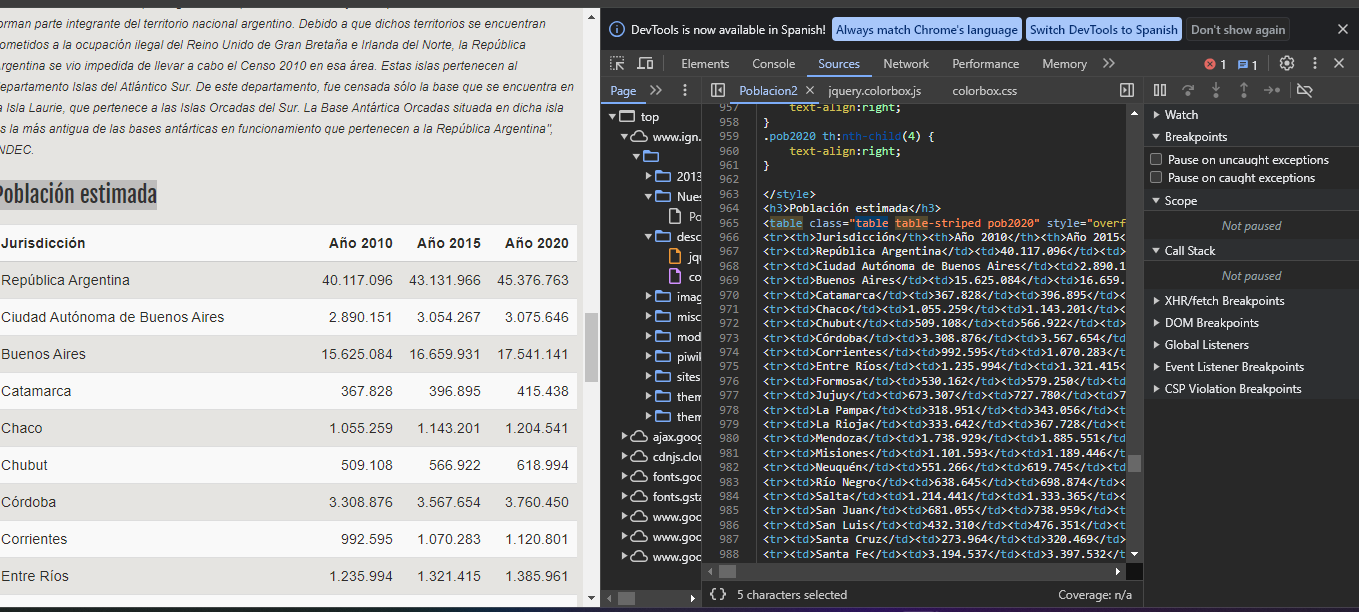

Se puede ver que la tabla de interés se encuentra dentro de una etiqueta 'table', pero hay mas de una de estas etiquetas en toda la página, por lo tanto se debe iterar por todas las etiquetas 'table' que encuentre hasta encontrar un encabezado que contenga los Atributos

In [21]:


# URL del sitio web que contiene la tabla
url = 'https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2'

# Se realiza la solicitud HTTP
response = requests.get(url)

# Se verifica si la solicitud fue exitosa
if response.status_code == 200:
    # Parsear el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Se encuentra la tabla por su clase
    tabla = soup.find('table', class_='table table-striped pob2020')

    # Se extrae los encabezados de las columnas
    encabezados = [th.text.strip() for th in tabla.find_all('th')]

    # Se inicializa una lista para los datos de la tabla
    datos_tabla = []

    # Se extrae los datos de cada fila
    for fila in tabla.find_all('tr')[1:]:  # Ignorar la primera fila con encabezados
        datos_fila = [td.text.strip() for td in fila.find_all('td')]
        datos_tabla.append(datos_fila)

    # Se crea un DataFrame de Pandas
    df_informacion = pd.DataFrame(datos_tabla, columns=encabezados)

    # Se imprime el DataFrame resultante
    print(df_informacion)

else:
    print(f'Error al realizar la solicitud HTTP. Código de estado: {response.status_code}')


                                         Jurisdicción    Año 2010    Año 2015  \
0                                 República Argentina  40.117.096  43.131.966   
1                     Ciudad Autónoma de Buenos Aires   2.890.151   3.054.267   
2                                        Buenos Aires  15.625.084  16.659.931   
3                                           Catamarca     367.828     396.895   
4                                               Chaco   1.055.259   1.143.201   
5                                              Chubut     509.108     566.922   
6                                             Córdoba   3.308.876   3.567.654   
7                                          Corrientes     992.595   1.070.283   
8                                          Entre Ríos   1.235.994   1.321.415   
9                                             Formosa     530.162     579.250   
10                                              Jujuy     673.307     727.780   
11                          

In [25]:
df_informacion

,Jurisdicción,Año 2015,Año 2020
0,República Argentina,43.131.966,45.376.763
1,Ciudad Autónoma de Buenos Aires,3.054.267,3.075.646
2,Buenos Aires,16.659.931,17.541.141
3,Catamarca,396.895,415.438
4,Chaco,1.143.201,1.204.541
5,Chubut,566.922,618.994
6,Córdoba,3.567.654,3.760.450
7,Corrientes,1.070.283,1.120.801
8,Entre Ríos,1.321.415,1.385.961
9,Formosa,579.250,605.193


Esta tabla trae muchos datos, solo se necesita los referidos a CABA

In [24]:
df_informacion = df_informacion.drop('Año 2010', axis=1)

In [26]:
# Se selecciona solo las filas correspondientes a "Ciudad Autónoma de Buenos Aires"
df_informacion = df_informacion[df_informacion['Jurisdicción'] == 'Ciudad Autónoma de Buenos Aires']


In [27]:
# Se visualiza
df_informacion

,Jurisdicción,Año 2015,Año 2020
1,Ciudad Autónoma de Buenos Aires,3.054.267,3.075.646


In [37]:
# Se verifican los datos y ipos
funciones.verificar_tipo_datos(df_informacion)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,Jurisdicción,[<class 'str'>],100.0,0.0,0
1,Año 2015,[<class 'int'>],100.0,0.0,0
2,Año 2020,[<class 'int'>],100.0,0.0,0


In [35]:
# Se limpia los datos: elimina puntos y convierte a tipo entero
df_informacion[['Año 2015', 'Año 2020']] = df_informacion[['Año 2015', 'Año 2020']].replace('[\.,]', '', regex=True).astype(int)


In [36]:
# Se convierte las columnas 'Año 2015' y 'Año 2020' a tipo entero (int)
df_informacion[['Año 2015', 'Año 2020']] = df_informacion[['Año 2015', 'Año 2020']].astype(int)


__________________

## <center> Se guarda el archivo

In [38]:
# Se construye la ruta completa al archivo CSV desde la ubicación del notebook
poblacion = os.path.join('..', 'CSV', 'datos_poblacion.csv')

# Se guarda el DataFrame en el archivo CSV
df_informacion.to_csv(poblacion, index=False, encoding='utf-8')

# Se emite un mensaje que se guardó
print(f'Se guardó el archivo {poblacion}')

Se guardó el archivo ..\CSV\datos_poblacion.csv
